In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# HYPOTHESIS

# Ram, Memory Amount, and CPU frequency have the highest correlation to the price.

In [4]:
df = df.drop("Product", axis=1)

In [5]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])

df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [6]:
df = df.drop("ScreenResolution", axis=1)

In [7]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])

df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

df = df.drop("Cpu", axis=1)

In [8]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [9]:
df["Ram"] = df["Ram"].str[:-2]

In [10]:
df["Ram"] = df["Ram"].astype("int")

df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [11]:
df["Screen Width"] = df["Screen Width"].astype("int")

df["Screen Height"] = df["Screen Height"].astype("int")

In [12]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])

df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [13]:
# Function to convert memory to MB.

def convert_memory_into_MB(val):
    if "GB" in val:
        return float(val[:val.find("GB")]) * 1000
    elif "TB" in val:
        return float(val[:val.find("TB")]) * 1000000

In [14]:
df["Memory Amount"] = df["Memory Amount"].apply(convert_memory_into_MB)

df = df.drop("Memory", axis=1)

In [15]:
df["Weight"] = df["Weight"].str[:-2]

df["Weight"] = df["Weight"].astype("float")

In [16]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

df = df.drop("Gpu", axis=1)

In [17]:
df = df.join(pd.get_dummies(df.OpSys))

df = df.drop("OpSys", axis=1)

In [18]:
cpu_categories = pd.get_dummies(df["CPU Brand"])

cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)

df = df.drop("CPU Brand", axis=1)

In [19]:
gpu_categories = pd.get_dummies(df["GPU Brand"])

gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)

df = df.drop("GPU Brand", axis=1)

In [20]:
df = df.join(pd.get_dummies(df.Company))

df = df.drop("Company", axis=1)

In [21]:
df = df.join(pd.get_dummies(df.TypeName))

df = df.drop("TypeName", axis=1)

In [22]:
df.head()

,laptop_ID,Inches,Ram,Weight,Price_euros,Screen Width,Screen Height,CPU Frequency,Memory Amount,Memory Type,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,8,1.37,1339.69,2560,1600,2.3,128000.0,SSD,...,False,False,False,False,False,False,False,False,True,False
1,2,13.3,8,1.34,898.94,1440,900,1.8,128000.0,Flash,...,False,False,False,False,False,False,False,False,True,False
2,3,15.6,8,1.86,575.00,1920,1080,2.5,256000.0,SSD,...,False,False,False,False,False,False,False,True,False,False
3,4,15.4,16,1.83,2537.45,2880,1800,2.7,512000.0,SSD,...,False,False,False,False,False,False,False,False,True,False
4,5,13.3,8,1.37,1803.60,2560,1600,3.1,256000.0,SSD,...,False,False,False,False,False,False,False,False,True,False


In [23]:
dummies = pd.get_dummies(df['Memory Type'], prefix='Memory_Type')

df = df.join(dummies)

df.drop('Memory Type', axis=1, inplace=True)

df.head()

,laptop_ID,Inches,Ram,Weight,Price_euros,Screen Width,Screen Height,CPU Frequency,Memory Amount,Android,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Memory_Type_Flash,Memory_Type_HDD,Memory_Type_Hybrid,Memory_Type_SSD
0,1,13.3,8,1.37,1339.69,2560,1600,2.3,128000.0,False,...,False,False,False,False,True,False,False,False,False,True
1,2,13.3,8,1.34,898.94,1440,900,1.8,128000.0,False,...,False,False,False,False,True,False,True,False,False,False
2,3,15.6,8,1.86,575.00,1920,1080,2.5,256000.0,False,...,False,False,False,True,False,False,False,False,False,True
3,4,15.4,16,1.83,2537.45,2880,1800,2.7,512000.0,False,...,False,False,False,False,True,False,False,False,False,True
4,5,13.3,8,1.37,1803.60,2560,1600,3.1,256000.0,False,...,False,False,False,False,True,False,False,False,False,True


<Axes: >

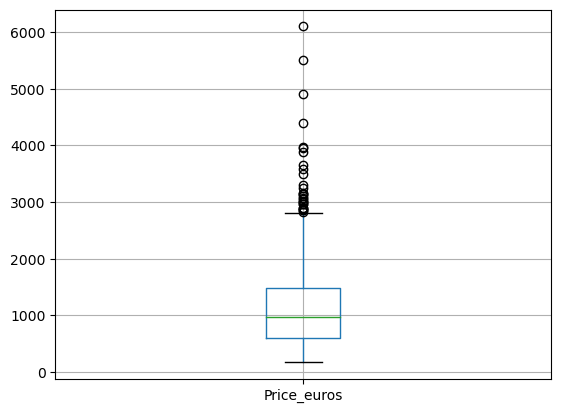

In [24]:
# Boxplot  
df.boxplot(column=['Price_euros'])

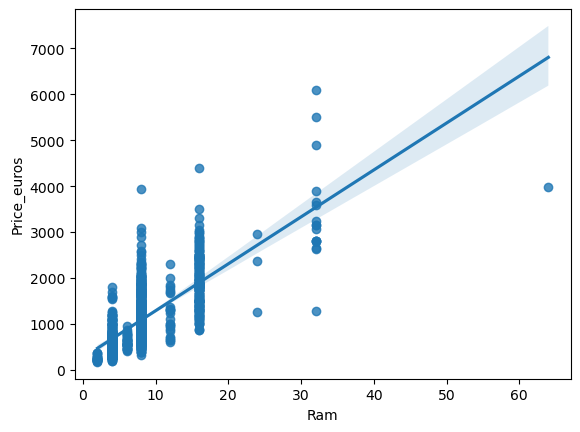

In [25]:
sns.regplot(x="Ram", y="Price_euros", data=df)
plt.show()

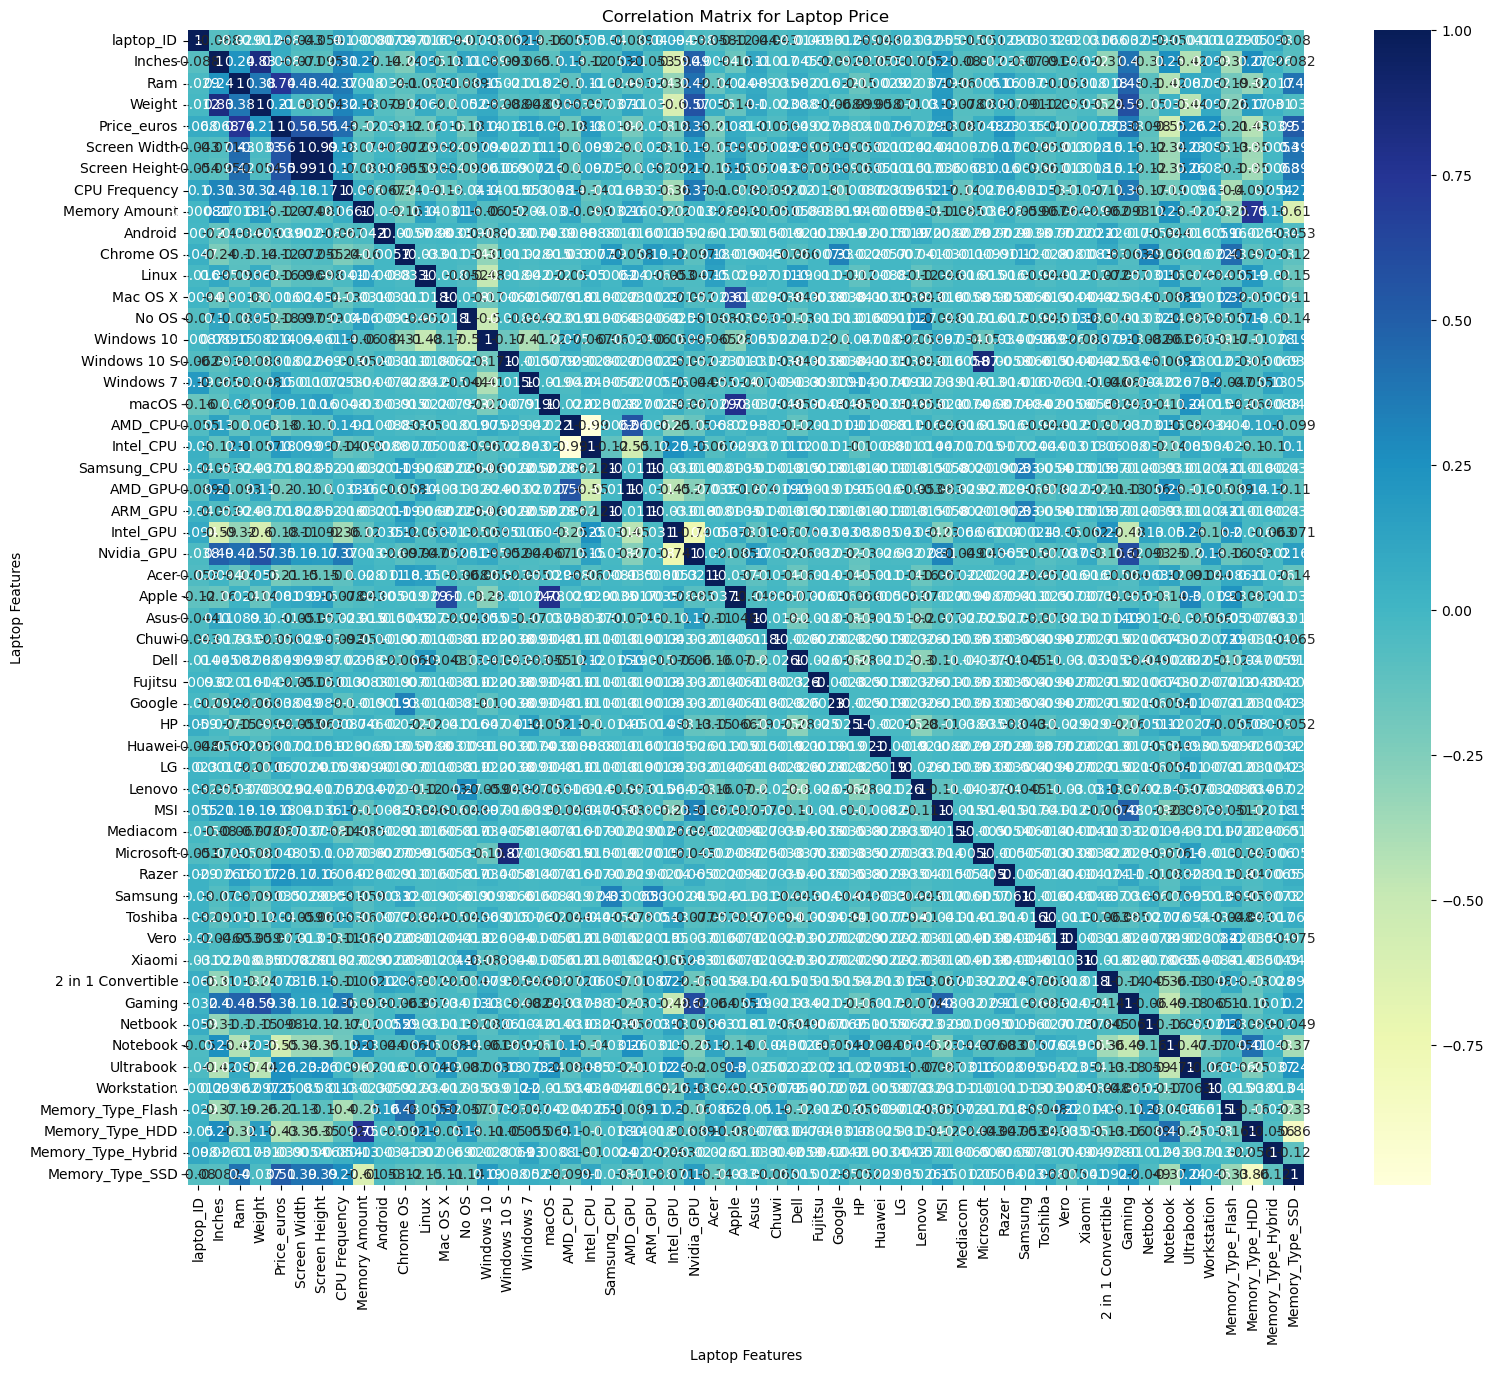

In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

plt.title("Correlation Matrix for Laptop Price")

plt.xlabel("Laptop Features")

plt.ylabel("Laptop Features")

plt.show()

In [27]:
# Calculate correlation
correlation_matrix = df.corr()

target_correlations = correlation_matrix['Price_euros'].abs().sort_values()

print(target_correlations)

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Memory_Type_Hybrid    0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [28]:
selected_features = target_correlations[-21:].index

selected_features = list(selected_features)

print(selected_features)

['MSI', 'AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight', 'Memory_Type_Flash', 'Razer', 'Workstation', 'Ultrabook', 'Nvidia_GPU', 'Gaming', 'Memory_Type_HDD', 'CPU Frequency', 'Memory_Type_SSD', 'Notebook', 'Screen Height', 'Screen Width', 'Ram', 'Price_euros']


In [29]:
# Check if features exist in DataFrame
selected_features = [feature for feature in selected_features if feature in df.columns]

# Select features from DataFrame
limited_df = df[selected_features]

# Print limited DataFrame
print(limited_df)

        MSI  AMD_CPU  Intel_CPU  Intel_GPU  AMD_GPU   Acer  Weight  \
0     False    False       True       True    False  False    1.37   
1     False    False       True       True    False  False    1.34   
2     False    False       True       True    False  False    1.86   
3     False    False       True      False     True  False    1.83   
4     False    False       True       True    False  False    1.37   
...     ...      ...        ...        ...      ...    ...     ...   
1298  False    False       True       True    False  False    1.80   
1299  False    False       True       True    False  False    1.30   
1300  False    False       True       True    False  False    1.50   
1301  False    False       True      False     True  False    2.19   
1302  False    False       True       True    False  False    2.20   

      Memory_Type_Flash  Razer  Workstation  ...  Nvidia_GPU  Gaming  \
0                 False  False        False  ...       False   False   
1              

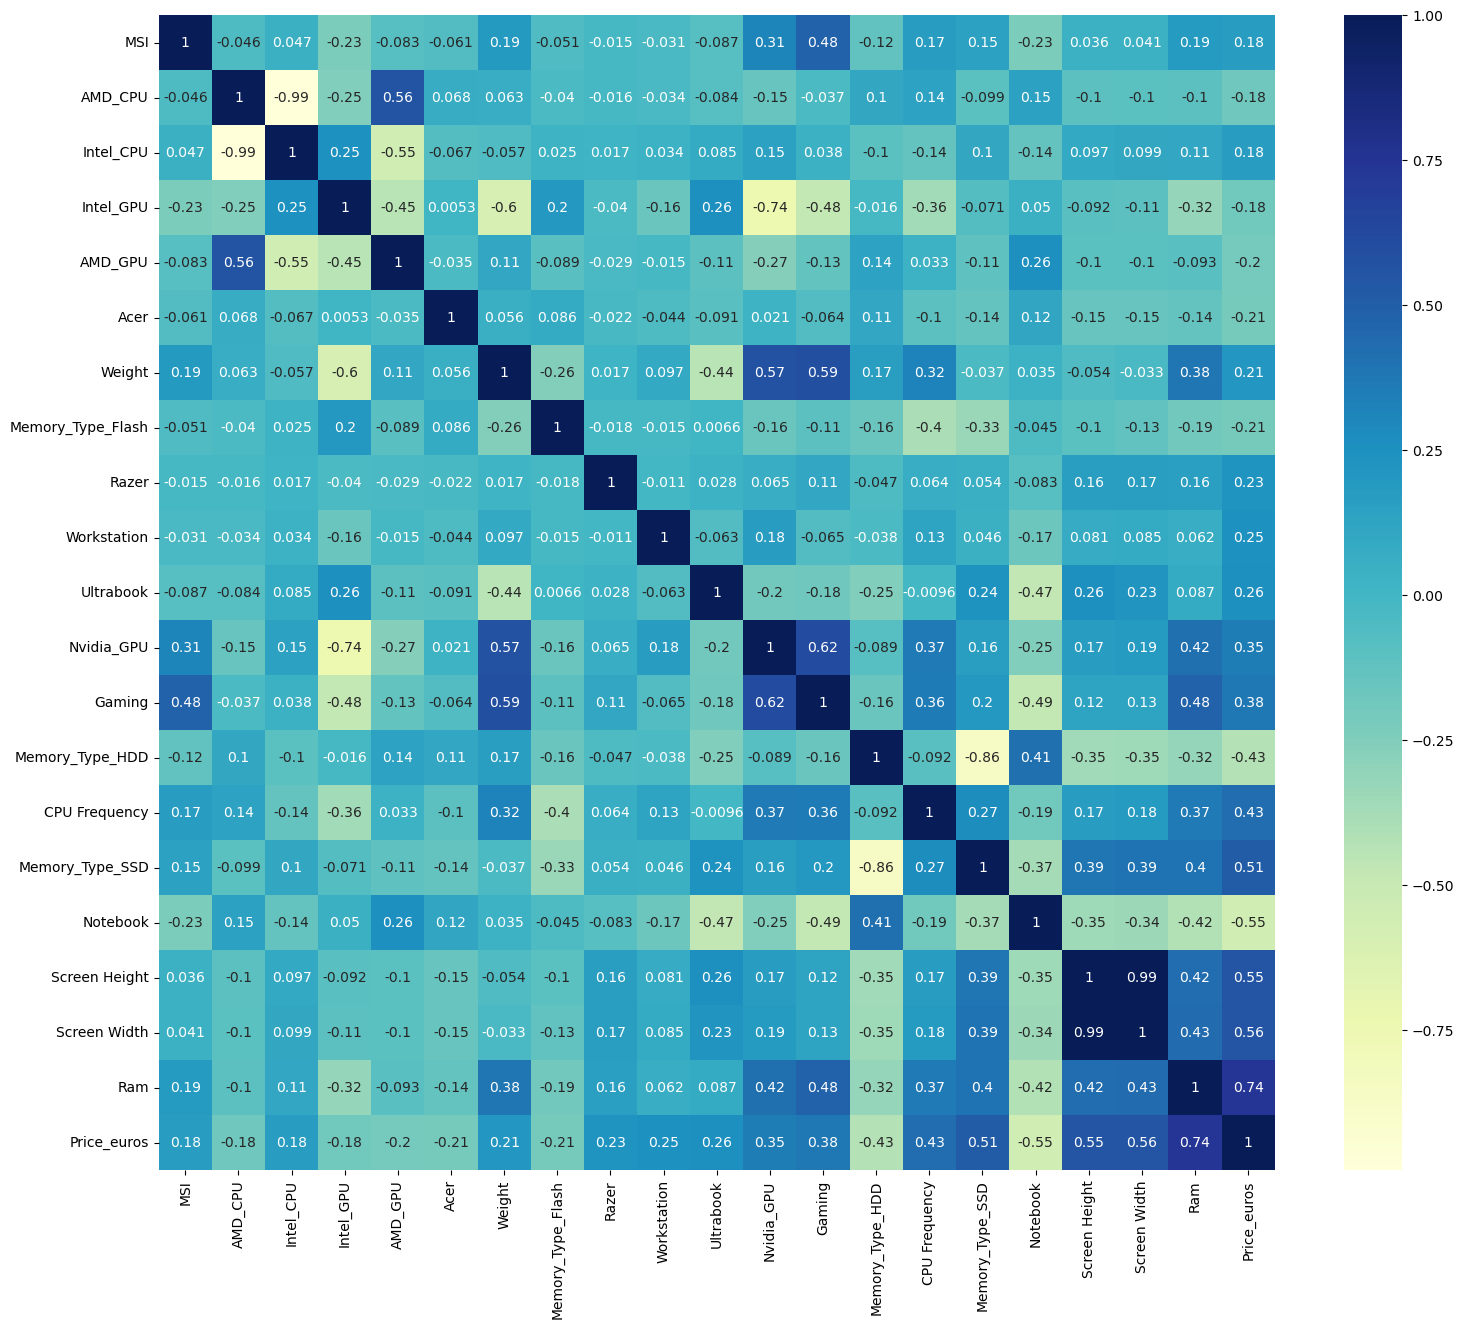

In [30]:
plt.figure(figsize=(18, 15))

sns.heatmap(limited_df.corr(method='pearson'), annot=True, cmap="YlGnBu")

plt.show()

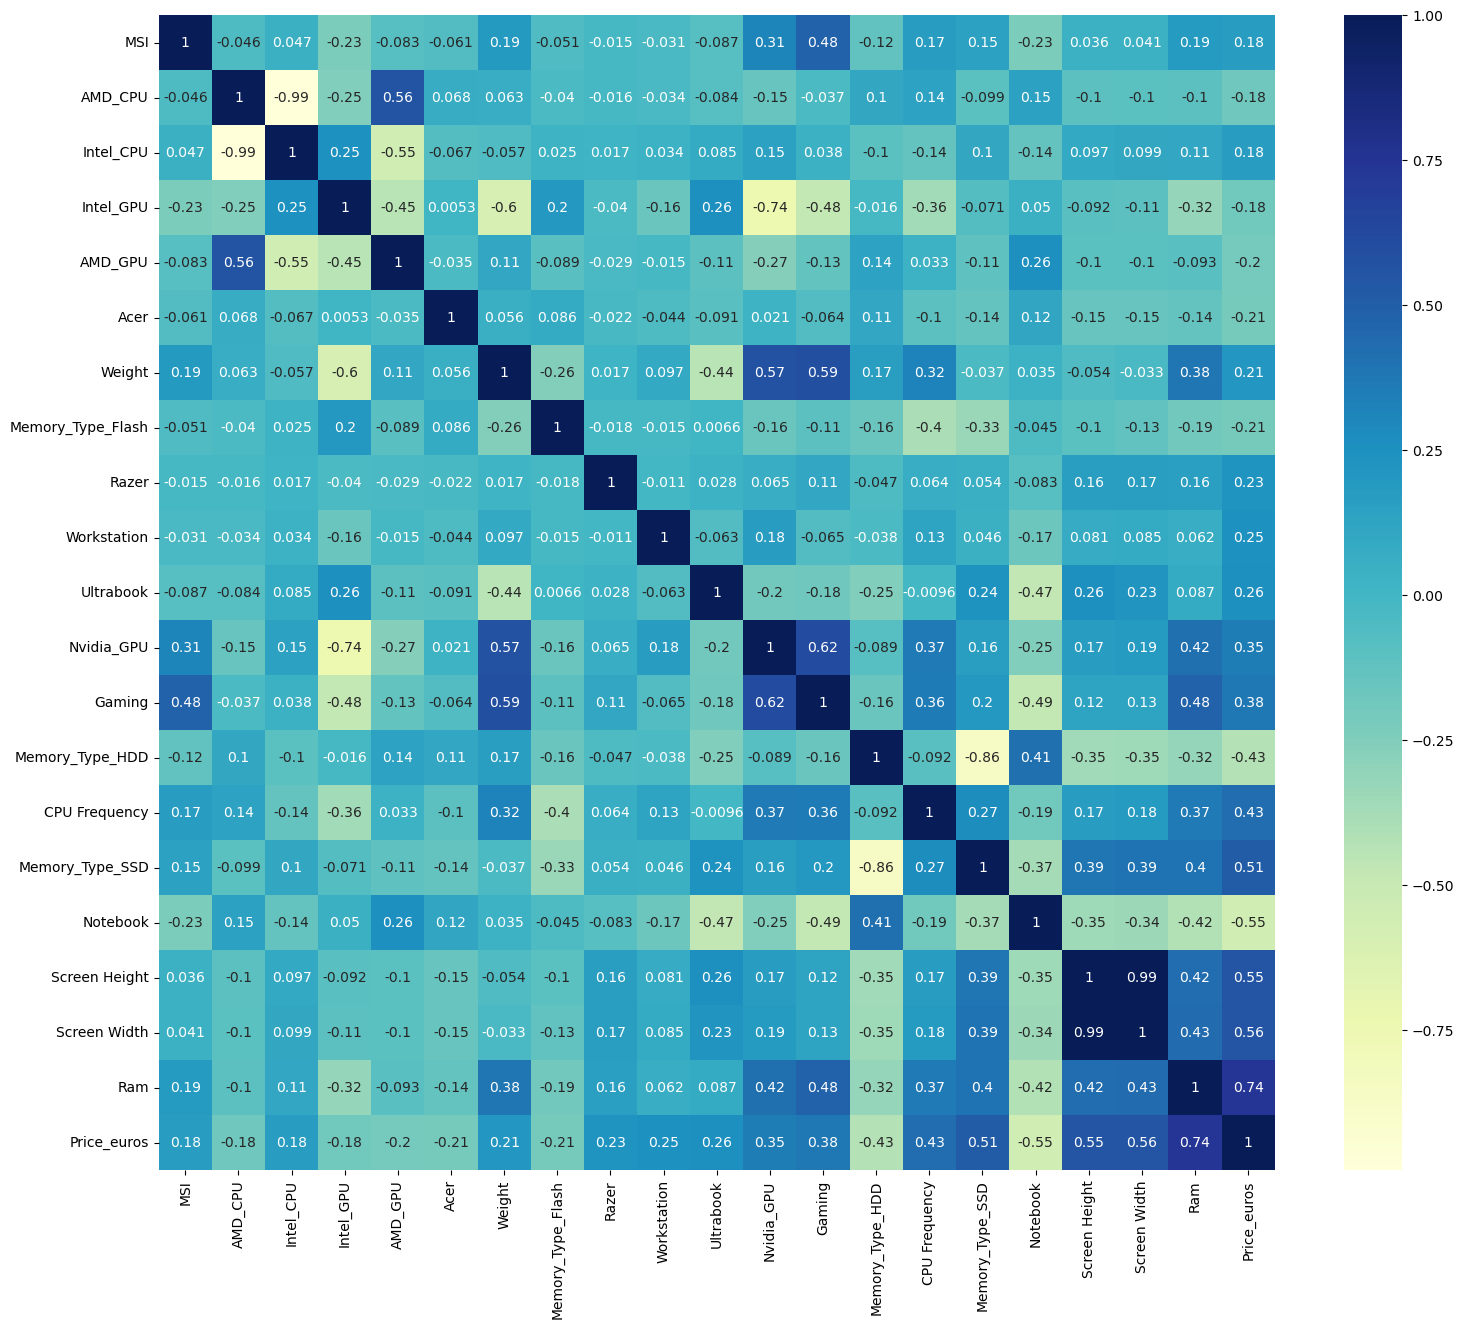

In [31]:
plt.figure(figsize=(18, 15))

sns.heatmap(limited_df.corr(method='pearson'), annot=True, cmap="YlGnBu")

plt.show()

In [32]:
corr_matrix = limited_df.corr()

corr_pairs = corr_matrix.unstack()

print(corr_pairs)

MSI          MSI              1.000000
             AMD_CPU         -0.046476
             Intel_CPU        0.046868
             Intel_GPU       -0.231791
             AMD_GPU         -0.083246
                                ...   
Price_euros  Notebook        -0.549248
             Screen Height    0.552809
             Screen Width     0.556529
             Ram              0.743007
             Price_euros      1.000000
Length: 441, dtype: float64


In [33]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Intel_CPU        AMD_CPU           -0.991632
AMD_CPU          Intel_CPU         -0.991632
Memory_Type_HDD  Memory_Type_SSD   -0.860551
Memory_Type_SSD  Memory_Type_HDD   -0.860551
Nvidia_GPU       Intel_GPU         -0.741936
                                      ...   
Memory_Type_SSD  Memory_Type_SSD    1.000000
Notebook         Notebook           1.000000
Screen Height    Screen Height      1.000000
Workstation      Workstation        1.000000
Price_euros      Price_euros        1.000000
Length: 441, dtype: float64


In [34]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Intel_CPU          AMD_CPU             -0.991632
AMD_CPU            Intel_CPU           -0.991632
Memory_Type_HDD    Memory_Type_SSD     -0.860551
Memory_Type_SSD    Memory_Type_HDD     -0.860551
Nvidia_GPU         Intel_GPU           -0.741936
Intel_GPU          Nvidia_GPU          -0.741936
Weight             Intel_GPU           -0.596378
Intel_GPU          Weight              -0.596378
Intel_CPU          AMD_GPU             -0.552637
AMD_GPU            Intel_CPU           -0.552637
Price_euros        Notebook            -0.549248
Notebook           Price_euros         -0.549248
Memory_Type_SSD    Price_euros          0.513609
Price_euros        Memory_Type_SSD      0.513609
Screen Height      Price_euros          0.552809
Price_euros        Screen Height        0.552809
                   Screen Width         0.556529
Screen Width       Price_euros          0.556529
AMD_GPU            AMD_CPU              0.558295
AMD_CPU            AMD_GPU              0.558295
Weight             N

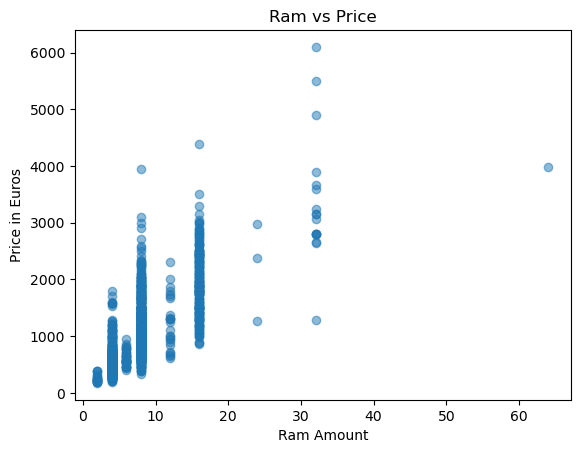

In [35]:
plt.scatter(x=df['Ram'], y=df['Price_euros'], alpha=0.5)

plt.title('Ram vs Price')

plt.xlabel('Ram Amount')

plt.ylabel('Price in Euros')

plt.show()

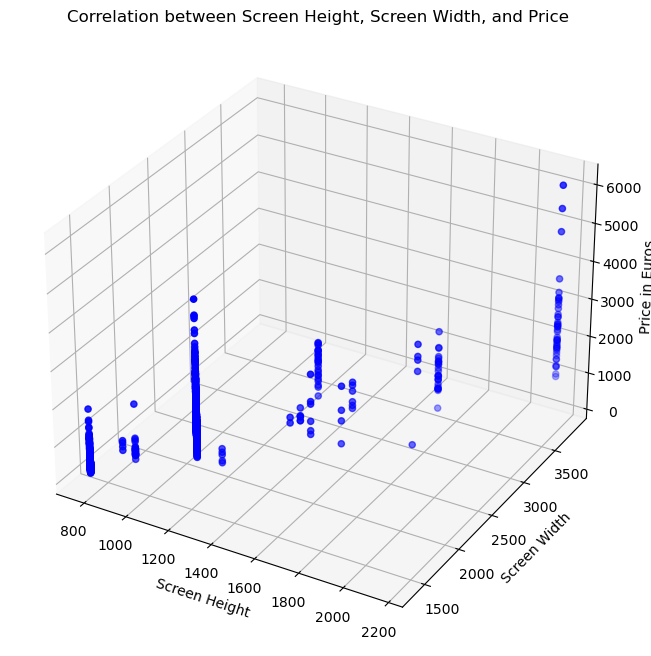

In [36]:
# Extracting variables
screen_height = df['Screen Height']

screen_width = df['Screen Width']

price = df['Price_euros']

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(screen_height, screen_width, price, c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Screen Height')

ax.set_ylabel('Screen Width')

ax.set_zlabel('Price in Euros')

ax.set_title('Correlation between Screen Height, Screen Width, and Price')

# Show plot
plt.show()

/Users/sophiedang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sophiedang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sophiedang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sophiedang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sophiedang/anaconda3/lib/python3.11/site-

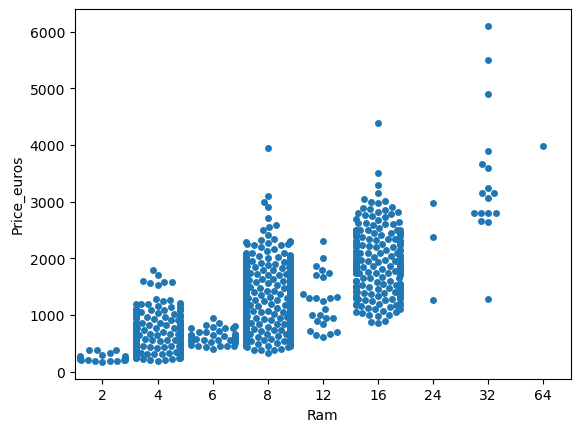

In [37]:
sns.swarmplot(x="Ram", y="Price_euros", data=df)

plt.show()

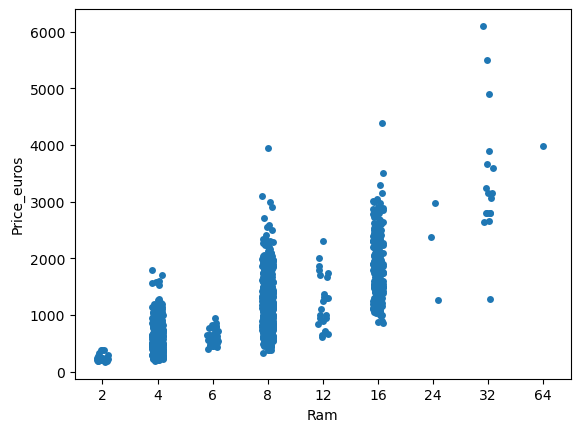

In [38]:
sns.stripplot(x="Ram", y="Price_euros", data=df)

plt.show()

In [39]:
# Conclusion
# Ram has the highest correlation to the laptop price(euros).
# Screen Height/Width also have high correlations to the price.